In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.metrics import classification_report, mean_squared_error, mean_absolute_error, r2_score, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, precision_recall_curve
from sklearn.model_selection import cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
import warnings
warnings.filterwarnings('ignore', category=UserWarning)
import time # to measure how long the models take
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, BaggingClassifier, VotingClassifier
from imblearn.over_sampling import SMOTE

In [3]:
df_train = pd.read_csv(r"C:\Users\gabri\Downloads\train.csv.zip", sep=";")
df_test = pd.read_csv(r"C:\Users\gabri\Downloads\test (1).csv", sep=";")

In [4]:
df_train.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [5]:
df_test.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [6]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [7]:
df_train.describe(include='all')

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
count,45211.000000,45211,45211,45211,45211,45211.000000,45211,45211,45211,45211.000000,45211,45211.000000,45211.000000,45211.000000,45211.000000,45211,45211
unique,NaN,12,3,4,2,NaN,2,2,3,NaN,12,NaN,NaN,NaN,NaN,4,2
top,NaN,blue-collar,married,secondary,no,NaN,yes,no,cellular,NaN,may,NaN,NaN,NaN,NaN,unknown,no
freq,NaN,9732,27214,23202,44396,NaN,25130,37967,29285,NaN,13766,NaN,NaN,NaN,NaN,36959,39922
mean,40.936210,NaN,NaN,NaN,NaN,1362.272058,NaN,NaN,NaN,15.806419,NaN,258.163080,2.763841,40.197828,0.580323,NaN,NaN
std,10.618762,NaN,NaN,NaN,NaN,3044.765829,NaN,NaN,NaN,8.322476,NaN,257.527812,3.098021,100.128746,2.303441,NaN,NaN
min,18.000000,NaN,NaN,NaN,NaN,-8019.000000,NaN,NaN,NaN,1.000000,NaN,0.000000,1.000000,-1.000000,0.000000,NaN,NaN
25%,33.000000,NaN,NaN,NaN,NaN,72.000000,NaN,NaN,NaN,8.000000,NaN,103.000000,1.000000,-1.000000,0.000000,NaN,NaN
50%,39.000000,NaN,NaN,NaN,NaN,448.000000,NaN,NaN,NaN,16.000000,NaN,180.000000,2.000000,-1.000000,0.000000,NaN,NaN
75%,48.000000,NaN,NaN,NaN,NaN,1428.000000,NaN,NaN,NaN,21.000000,NaN,319.000000,3.000000,-1.000000,0.000000,NaN,NaN


In [8]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB


In [9]:
df_test.describe(include='all')

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
count,4521.000000,4521,4521,4521,4521,4521.000000,4521,4521,4521,4521.000000,4521,4521.000000,4521.000000,4521.000000,4521.000000,4521,4521
unique,NaN,12,3,4,2,NaN,2,2,3,NaN,12,NaN,NaN,NaN,NaN,4,2
top,NaN,management,married,secondary,no,NaN,yes,no,cellular,NaN,may,NaN,NaN,NaN,NaN,unknown,no
freq,NaN,969,2797,2306,4445,NaN,2559,3830,2896,NaN,1398,NaN,NaN,NaN,NaN,3705,4000
mean,41.170095,NaN,NaN,NaN,NaN,1422.657819,NaN,NaN,NaN,15.915284,NaN,263.961292,2.793630,39.766645,0.542579,NaN,NaN
std,10.576211,NaN,NaN,NaN,NaN,3009.638142,NaN,NaN,NaN,8.247667,NaN,259.856633,3.109807,100.121124,1.693562,NaN,NaN
min,19.000000,NaN,NaN,NaN,NaN,-3313.000000,NaN,NaN,NaN,1.000000,NaN,4.000000,1.000000,-1.000000,0.000000,NaN,NaN
25%,33.000000,NaN,NaN,NaN,NaN,69.000000,NaN,NaN,NaN,9.000000,NaN,104.000000,1.000000,-1.000000,0.000000,NaN,NaN
50%,39.000000,NaN,NaN,NaN,NaN,444.000000,NaN,NaN,NaN,16.000000,NaN,185.000000,2.000000,-1.000000,0.000000,NaN,NaN
75%,49.000000,NaN,NaN,NaN,NaN,1480.000000,NaN,NaN,NaN,21.000000,NaN,329.000000,3.000000,-1.000000,0.000000,NaN,NaN


In [10]:
df_train.drop_duplicates(inplace=True)
df_test.drop_duplicates(inplace=True)

In [11]:
df_train.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [12]:
df_test.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

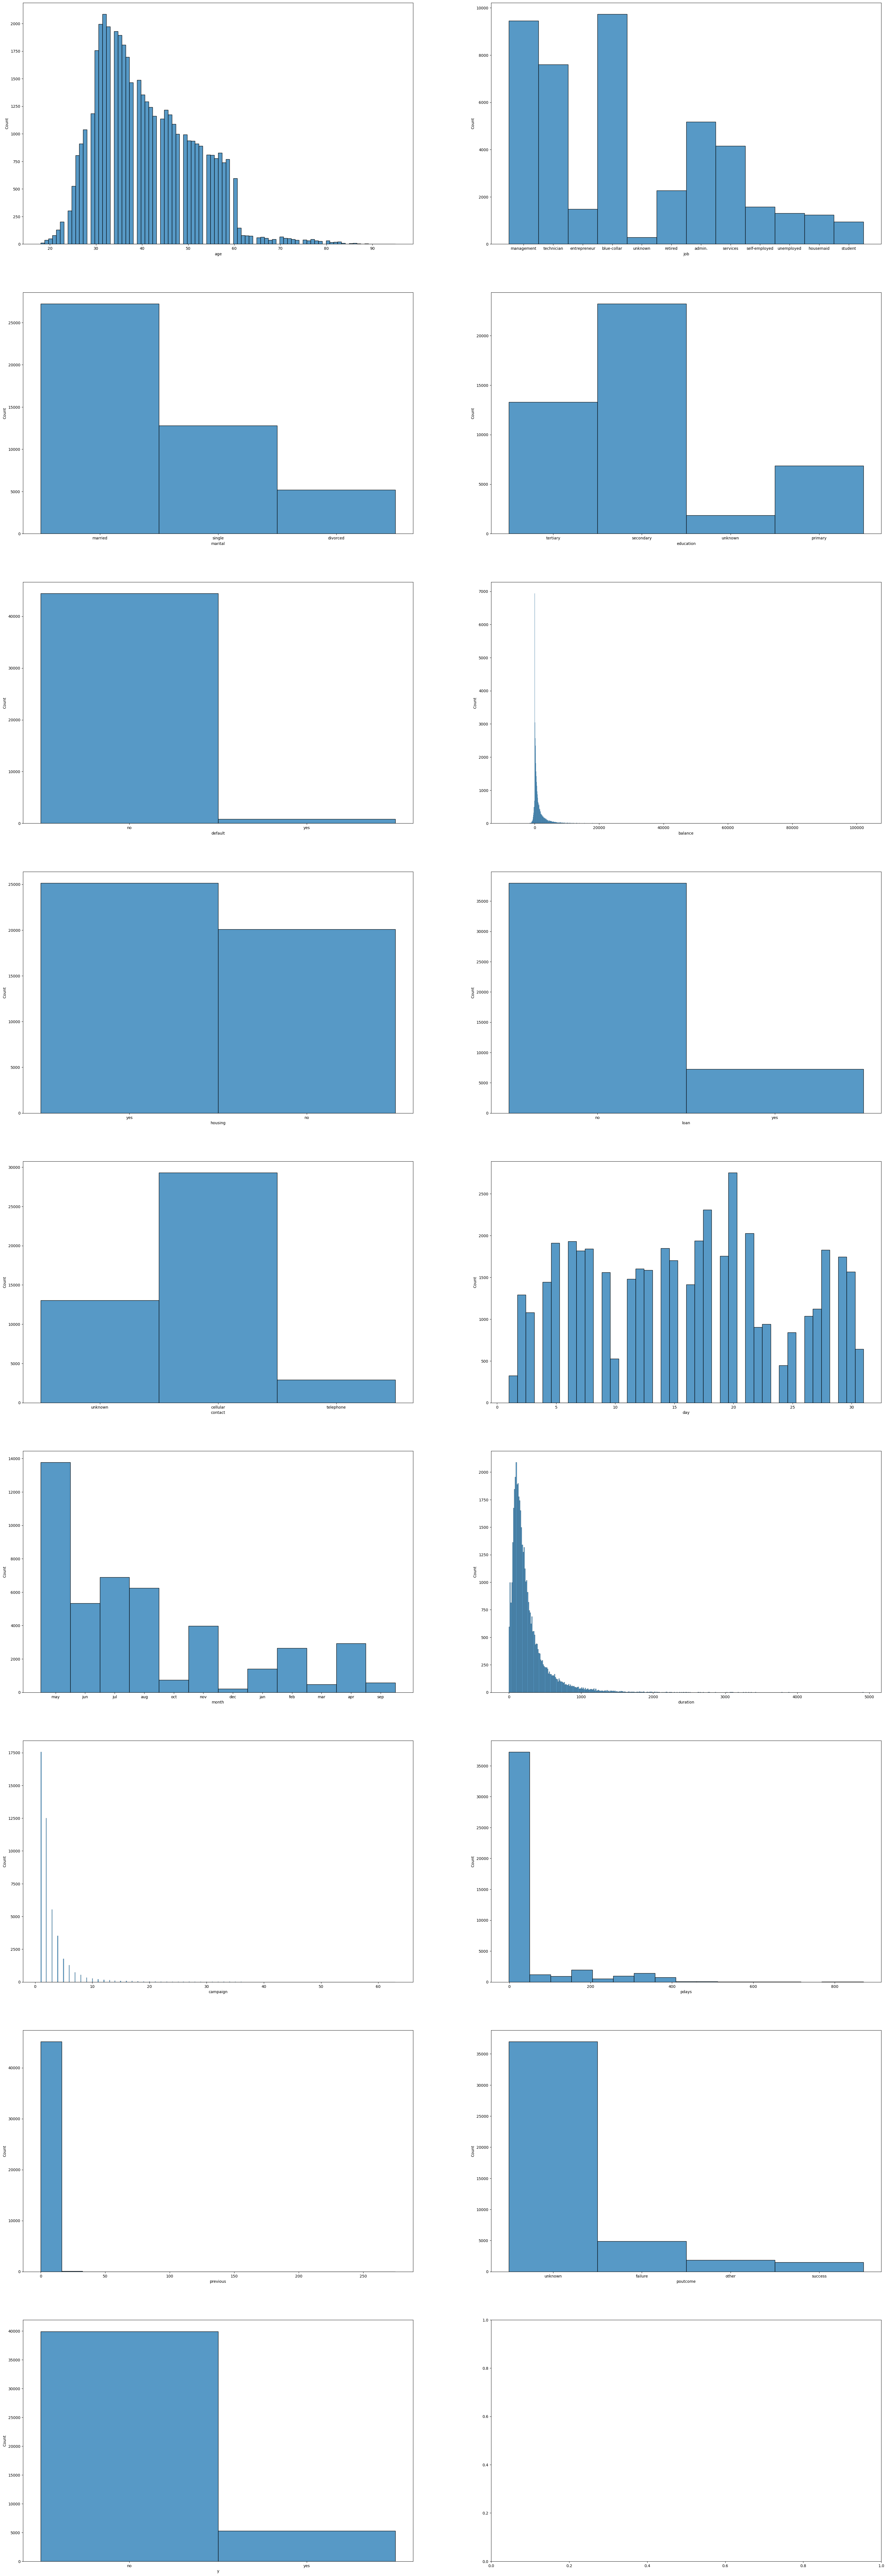

In [13]:
fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6), (ax7, ax8), (ax9, ax10), (ax11, ax12), (ax13, ax14), (ax15, ax16), (ax17, _)) = plt.subplots(9, 2, figsize=(40, 120))

sns.histplot(df_train['age'], ax=ax1)
sns.histplot(df_train['job'], ax=ax2)
sns.histplot(df_train['marital'], ax=ax3)
sns.histplot(df_train['education'], ax=ax4)
sns.histplot(df_train['default'], ax=ax5)
sns.histplot(df_train['balance'], ax=ax6)
sns.histplot(df_train['housing'], ax=ax7)
sns.histplot(df_train['loan'], ax=ax8)
sns.histplot(df_train['contact'], ax=ax9)
sns.histplot(df_train['day'], ax=ax10)
sns.histplot(df_train['month'], ax=ax11)
sns.histplot(df_train['duration'], ax=ax12)
sns.histplot(df_train['campaign'], ax=ax13)
sns.histplot(df_train['pdays'], ax=ax14)
sns.histplot(df_train['previous'], ax=ax15)
sns.histplot(df_train['poutcome'], ax=ax16)
sns.histplot(df_train['y'], ax=ax17)
plt.show()

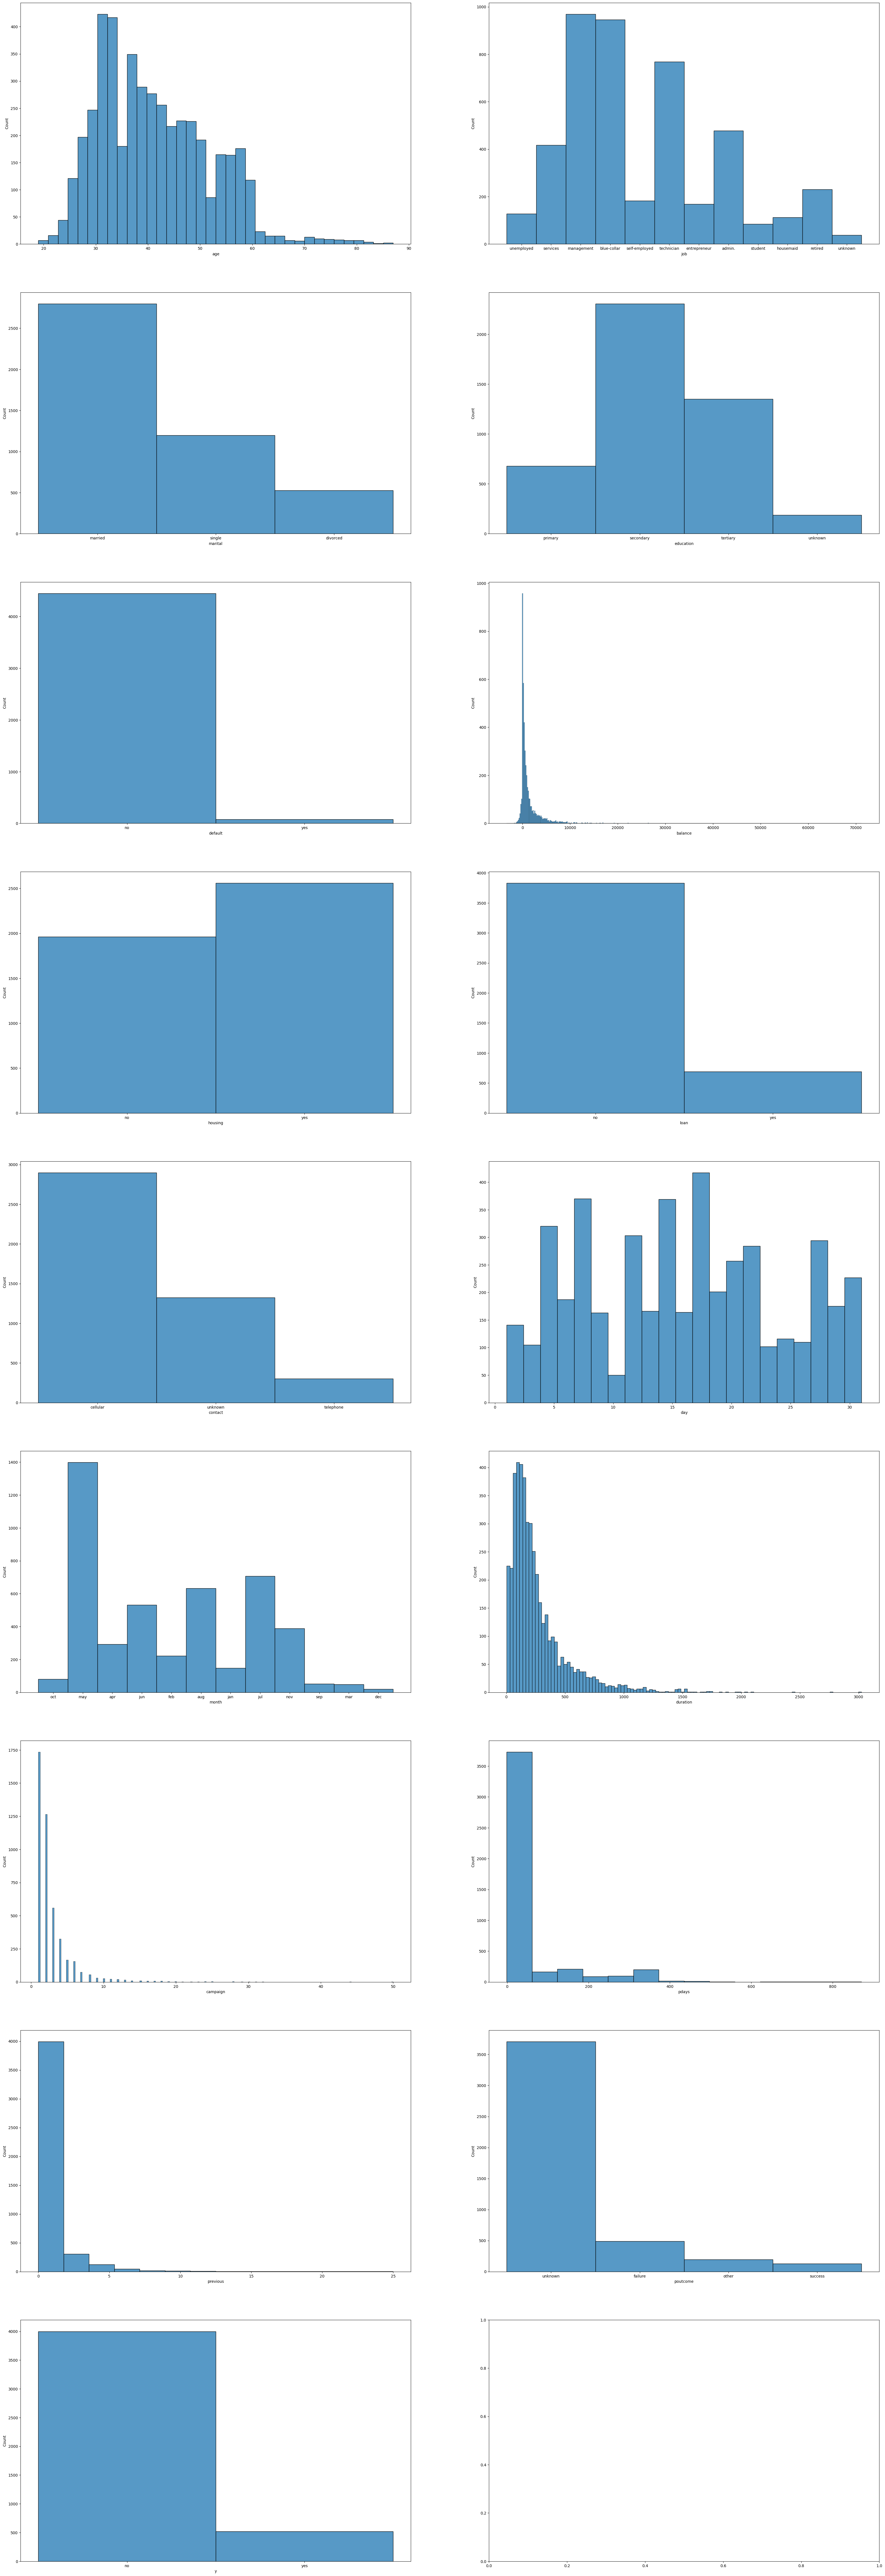

In [14]:
fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6), (ax7, ax8), (ax9, ax10), (ax11, ax12), (ax13, ax14), (ax15, ax16), (ax17, _)) = plt.subplots(9, 2, figsize=(40, 120))

sns.histplot(df_test['age'], ax=ax1)
sns.histplot(df_test['job'], ax=ax2)
sns.histplot(df_test['marital'], ax=ax3)
sns.histplot(df_test['education'], ax=ax4)
sns.histplot(df_test['default'], ax=ax5)
sns.histplot(df_test['balance'], ax=ax6)
sns.histplot(df_test['housing'], ax=ax7)
sns.histplot(df_test['loan'], ax=ax8)
sns.histplot(df_test['contact'], ax=ax9)
sns.histplot(df_test['day'], ax=ax10)
sns.histplot(df_test['month'], ax=ax11)
sns.histplot(df_test['duration'], ax=ax12)
sns.histplot(df_test['campaign'], ax=ax13)
sns.histplot(df_test['pdays'], ax=ax14)
sns.histplot(df_test['previous'], ax=ax15)
sns.histplot(df_test['poutcome'], ax=ax16)
sns.histplot(df_test['y'], ax=ax17)
plt.show()

In [15]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


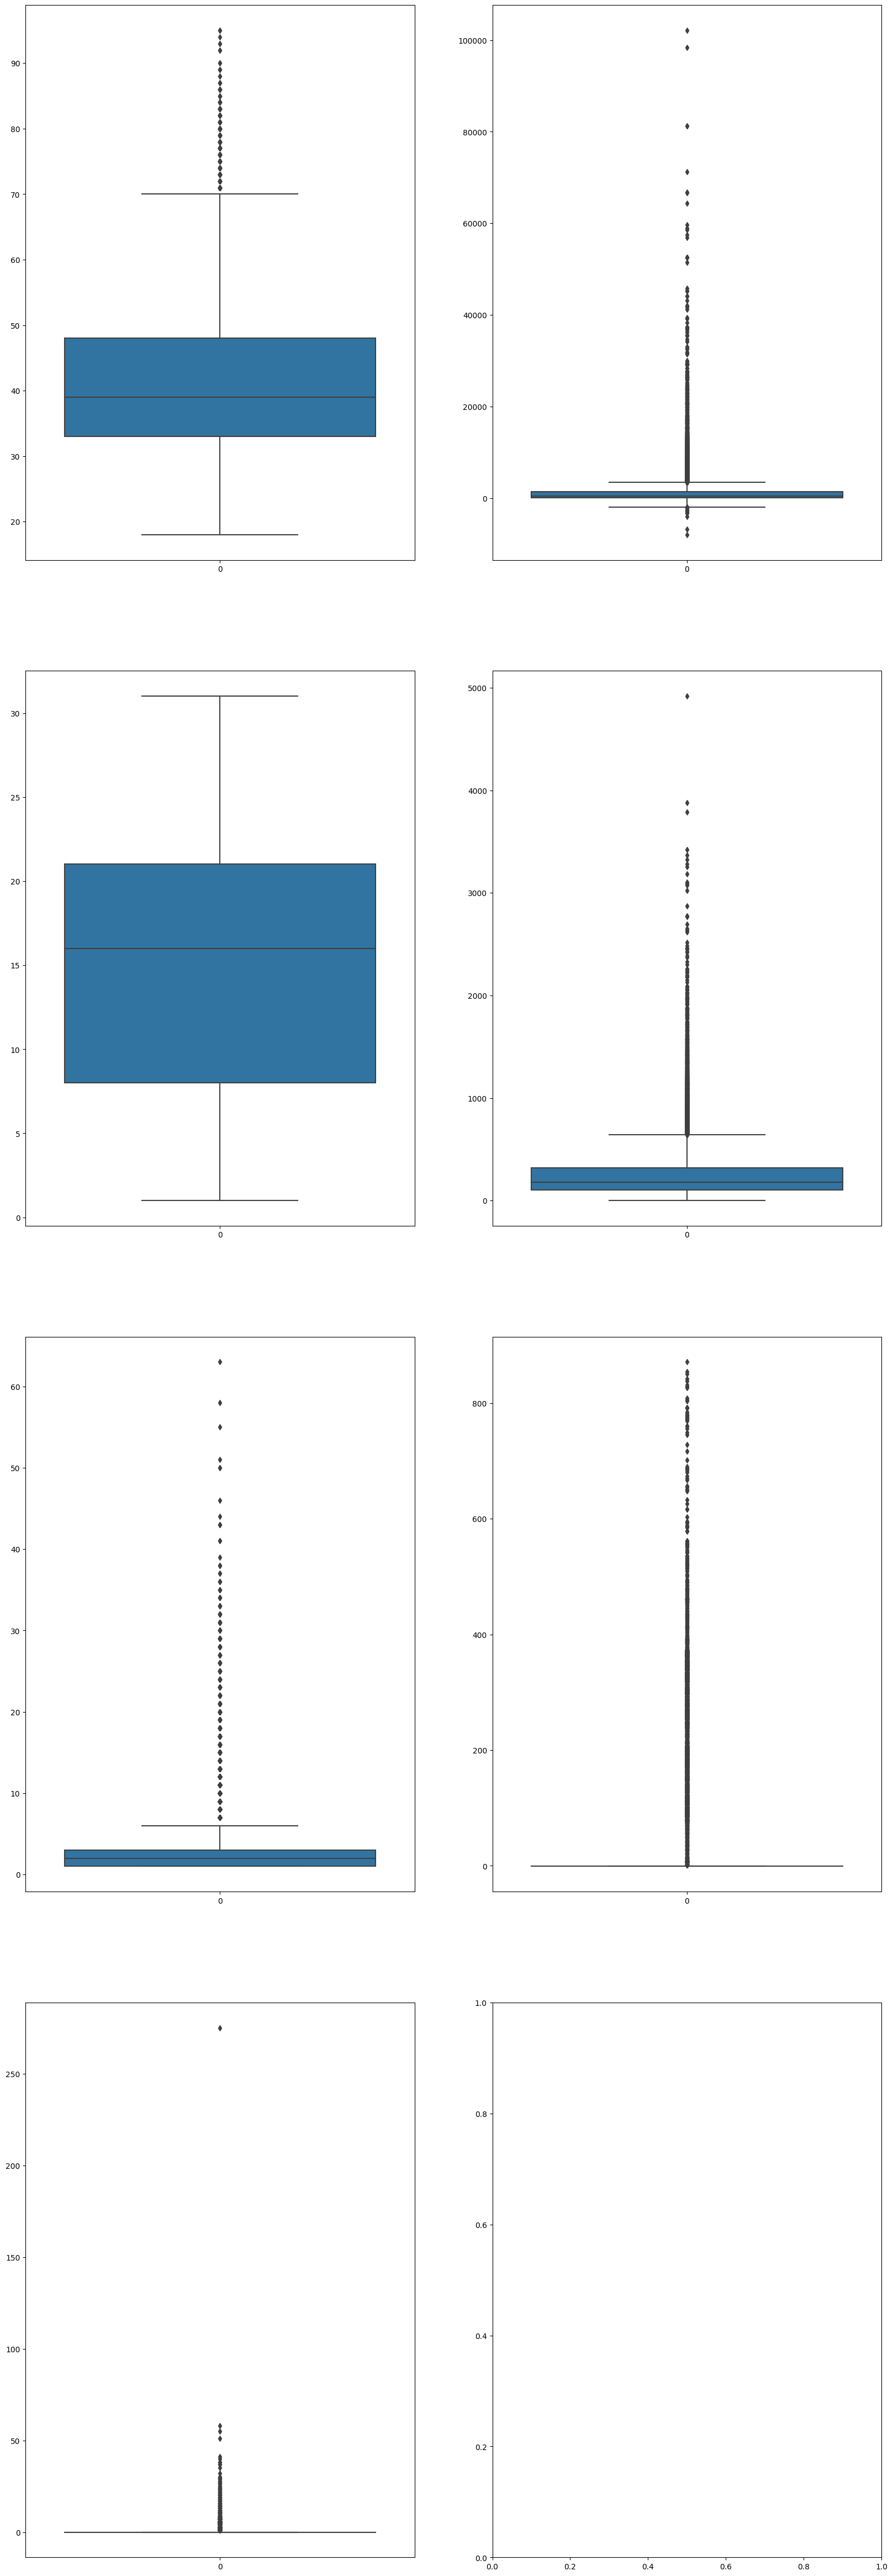

In [16]:
fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6), (ax7, _)) = plt.subplots(4, 2, figsize=(20, 60))

sns.boxplot(df_train['age'], ax=ax1)
sns.boxplot(df_train['balance'], ax=ax2)
sns.boxplot(df_train['day'], ax=ax3)
sns.boxplot(df_train['duration'], ax=ax4)
sns.boxplot(df_train['campaign'], ax=ax5)
sns.boxplot(df_train['pdays'], ax=ax6)
sns.boxplot(df_train['previous'], ax=ax7)
plt.show()

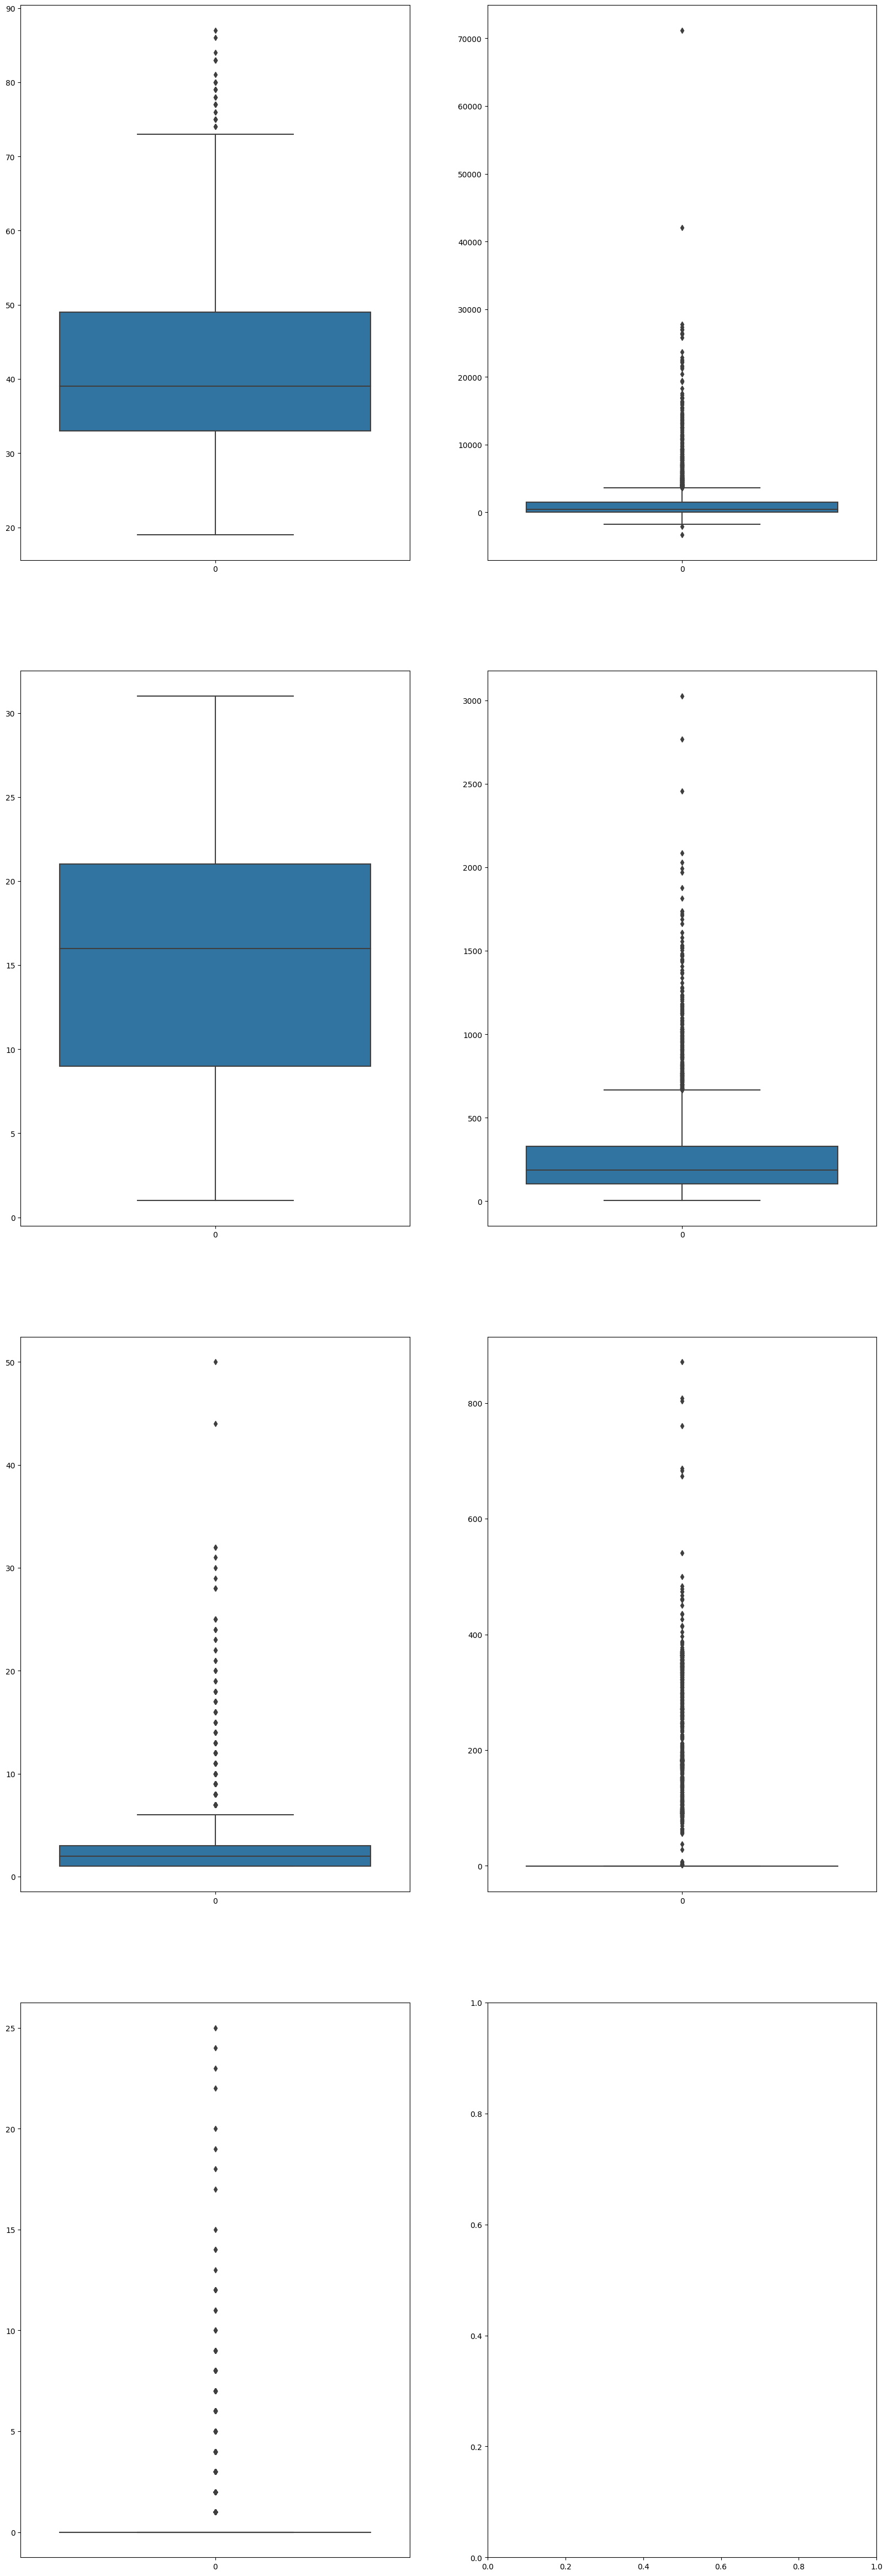

In [17]:
fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6), (ax7, _)) = plt.subplots(4, 2, figsize=(20, 60))

sns.boxplot(df_test['age'], ax=ax1)
sns.boxplot(df_test['balance'], ax=ax2)
sns.boxplot(df_test['day'], ax=ax3)
sns.boxplot(df_test['duration'], ax=ax4)
sns.boxplot(df_test['campaign'], ax=ax5)
sns.boxplot(df_test['pdays'], ax=ax6)
sns.boxplot(df_test['previous'], ax=ax7)
plt.show()

In [18]:
df_train.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [19]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


<Axes: xlabel='y', ylabel='previous'>

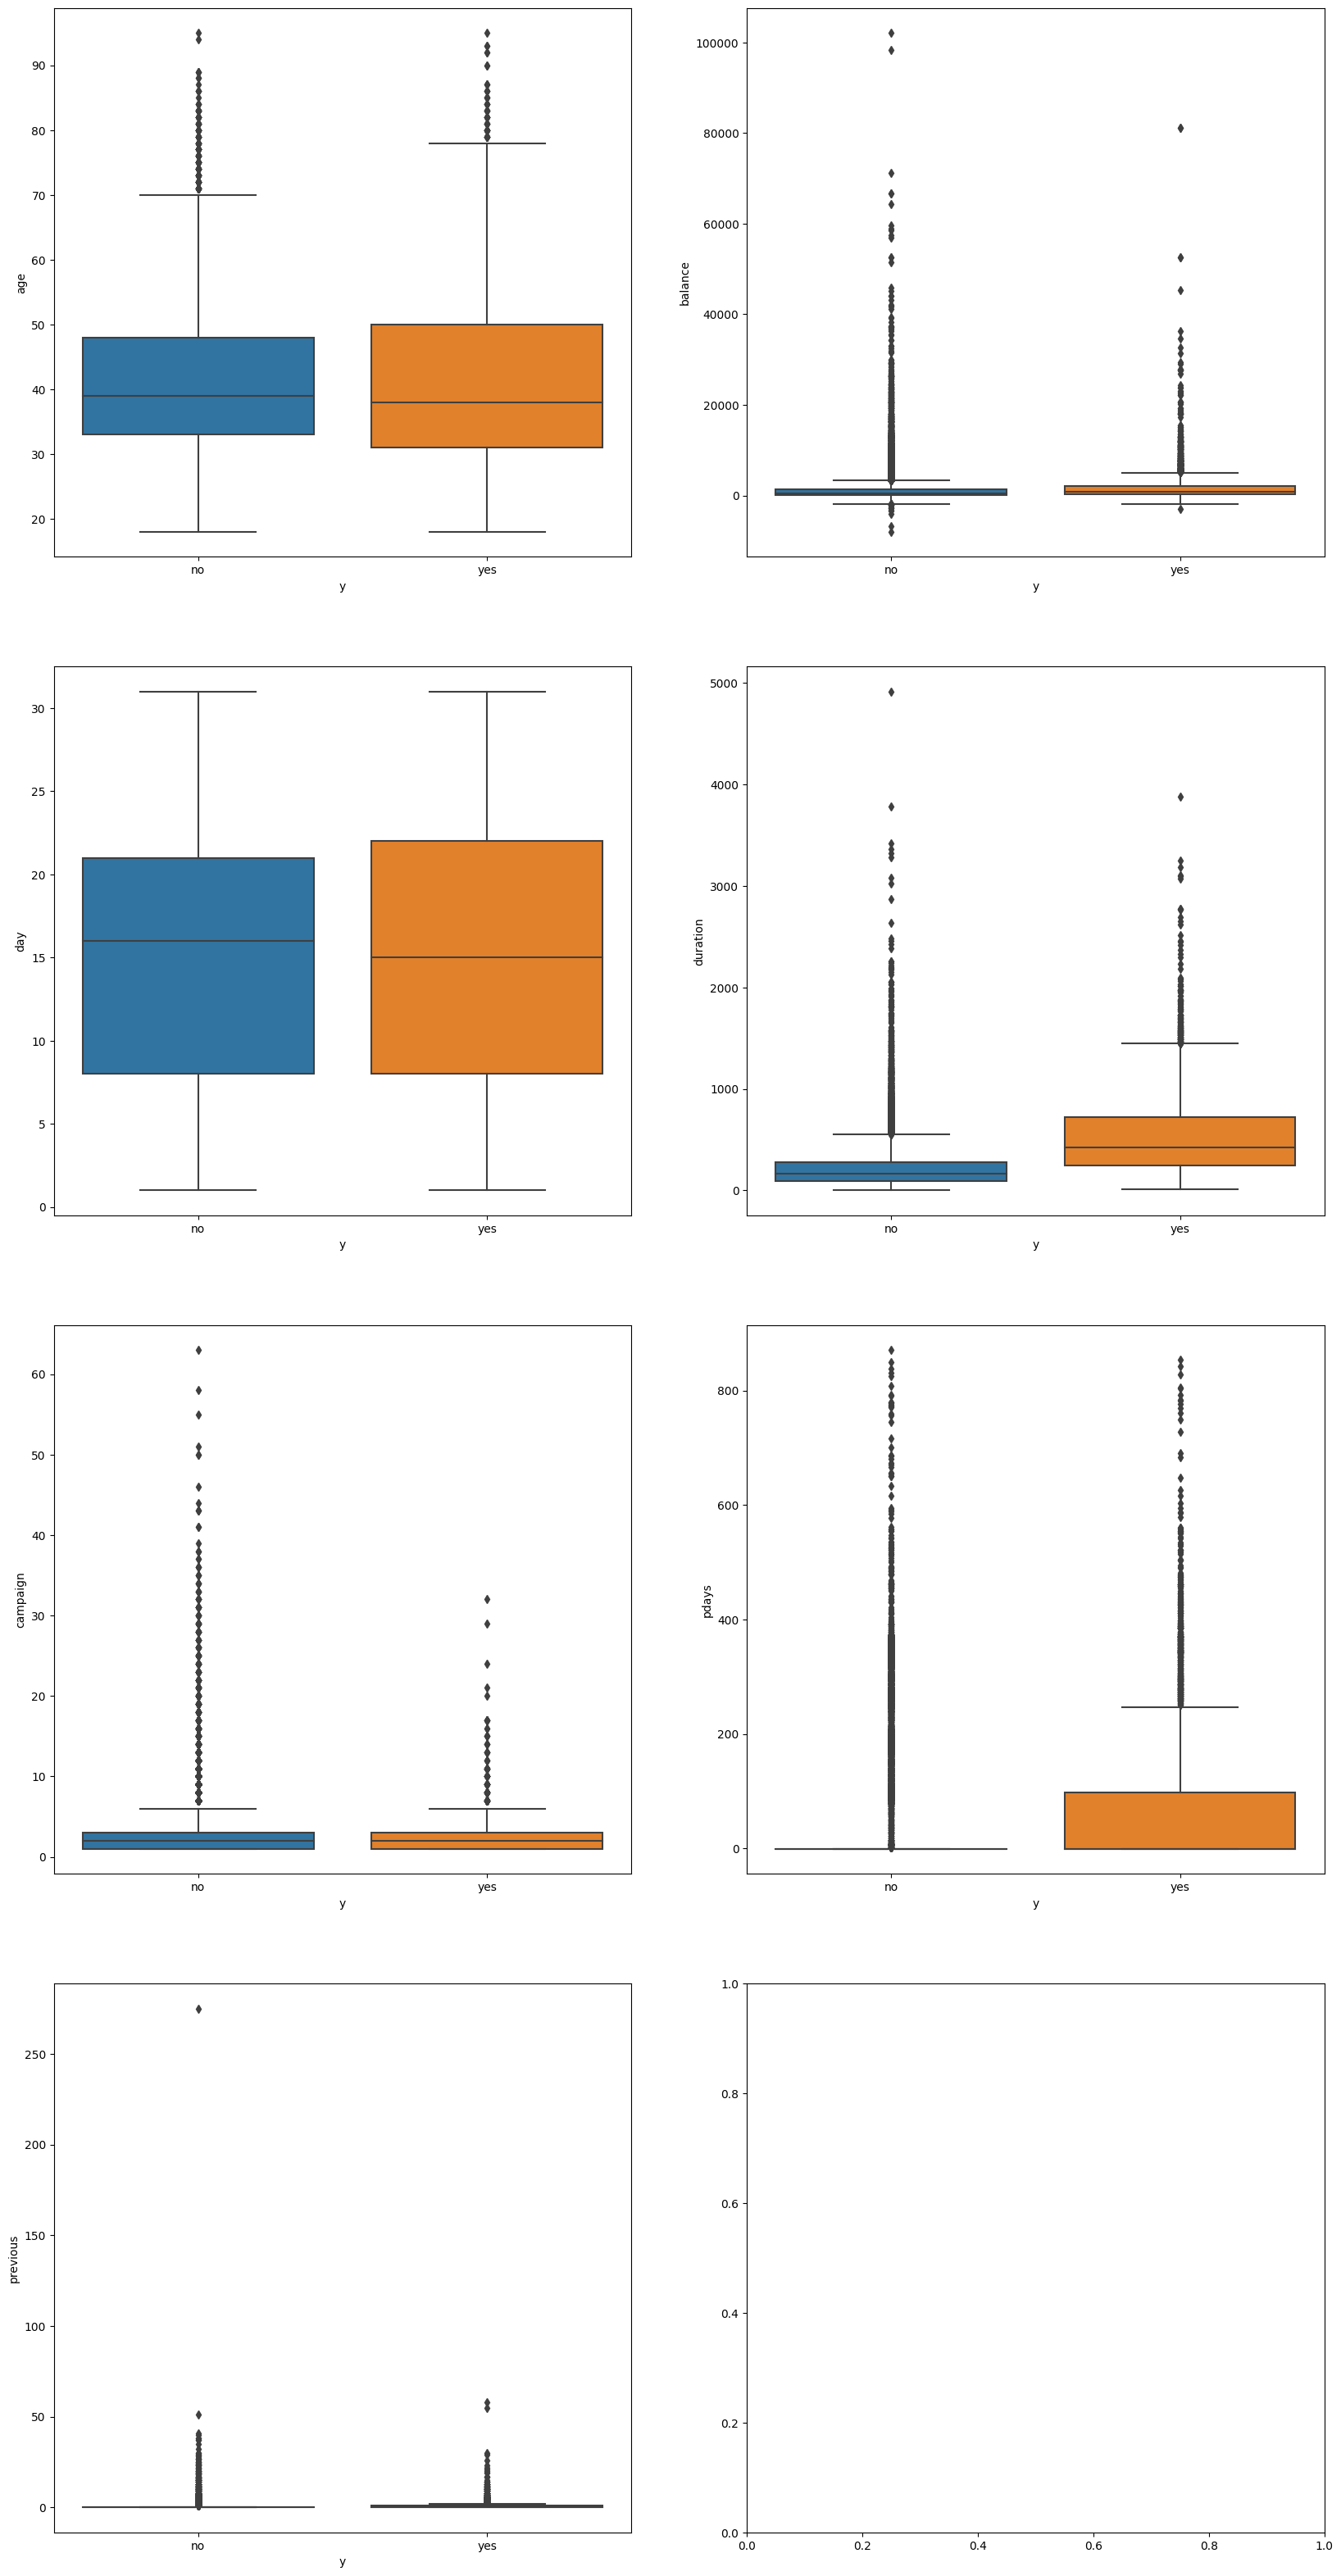

In [20]:
fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6), (ax7, _)) = plt.subplots(4,2, figsize=(20,40))

sns.boxplot(x='y',y='age', data=df_train, ax=ax1)
sns.boxplot(x='y',y='balance', data=df_train, ax=ax2)
sns.boxplot(x='y',y='day', data=df_train, ax=ax3)
sns.boxplot(x='y',y='duration', data=df_train, ax=ax4)
sns.boxplot(x='y',y='campaign', data=df_train, ax=ax5)
sns.boxplot(x='y',y='pdays', data=df_train, ax=ax6)
sns.boxplot(x='y',y='previous', data=df_train, ax=ax7)

<Axes: xlabel='y', ylabel='previous'>

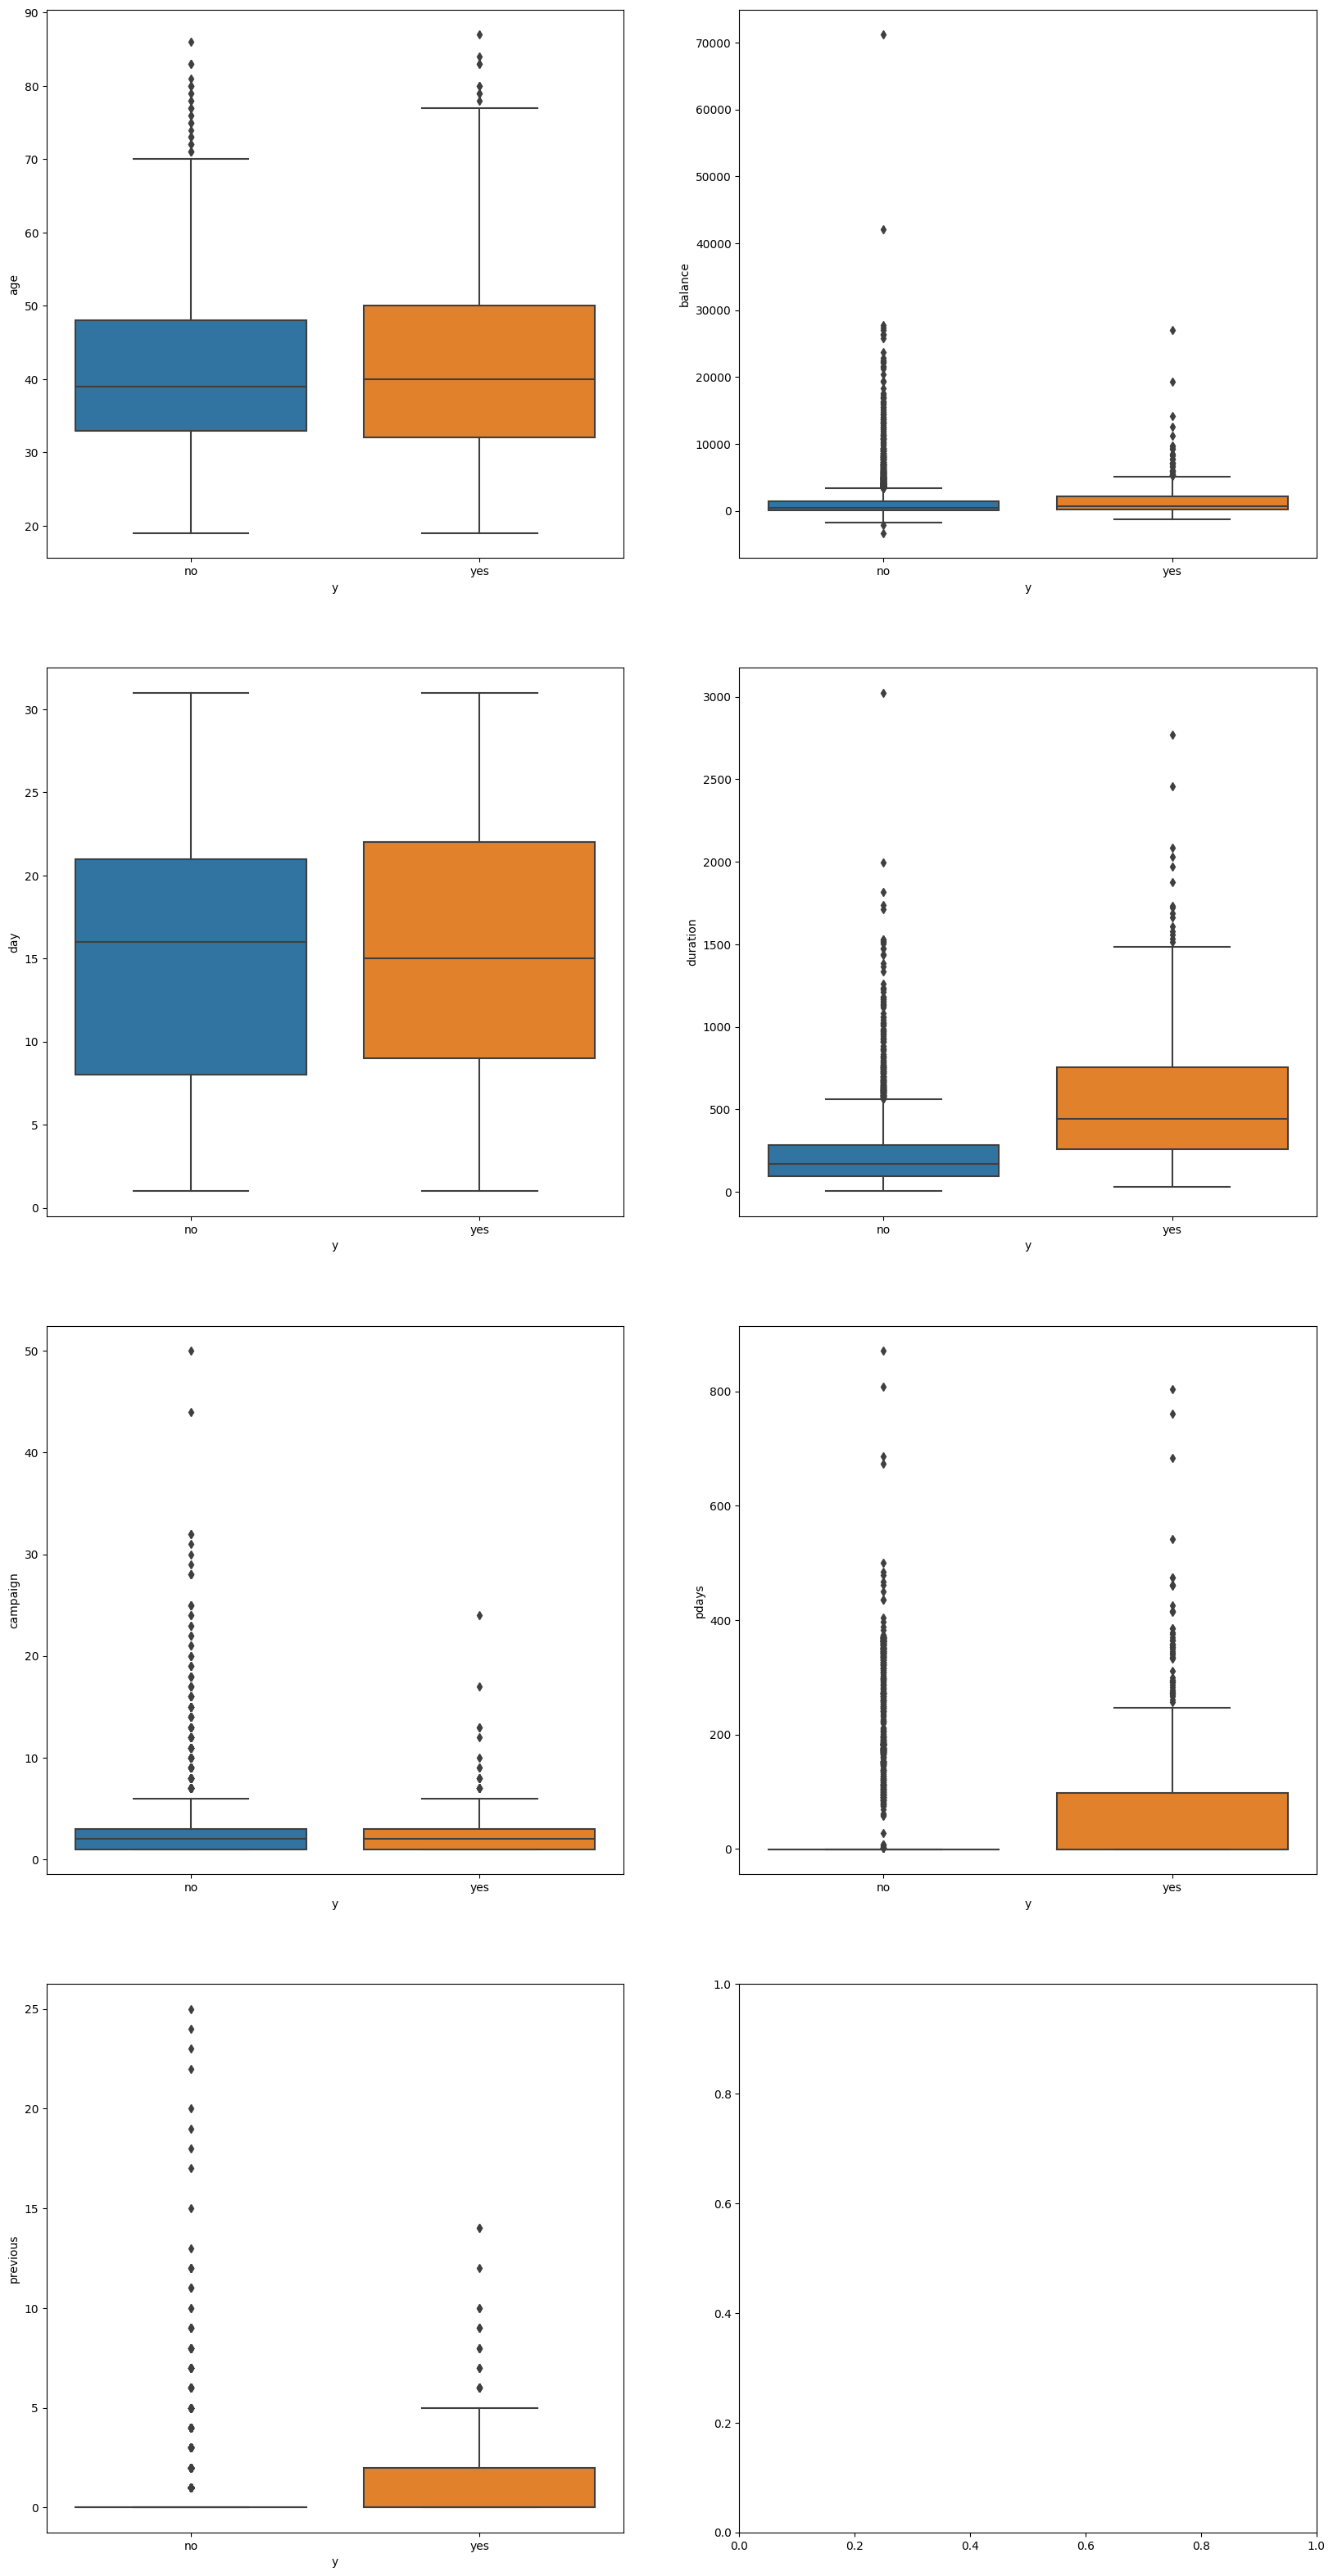

In [21]:
fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6), (ax7, _)) = plt.subplots(4,2, figsize=(20,40))

sns.boxplot(x='y',y='age', data=df_test, ax=ax1)
sns.boxplot(x='y',y='balance', data=df_test, ax=ax2)
sns.boxplot(x='y',y='day', data=df_test, ax=ax3)
sns.boxplot(x='y',y='duration', data=df_test, ax=ax4)
sns.boxplot(x='y',y='campaign', data=df_test, ax=ax5)
sns.boxplot(x='y',y='pdays', data=df_test, ax=ax6)
sns.boxplot(x='y',y='previous', data=df_test, ax=ax7)

In [22]:
df_train.groupby('y').count()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
y,,,,,,,,,,,,,,,,
no,39922,39922,39922,39922,39922,39922,39922,39922,39922,39922,39922,39922,39922,39922,39922,39922
yes,5289,5289,5289,5289,5289,5289,5289,5289,5289,5289,5289,5289,5289,5289,5289,5289


In [23]:
df_test.groupby('y').count()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
y,,,,,,,,,,,,,,,,
no,4000,4000,4000,4000,4000,4000,4000,4000,4000,4000,4000,4000,4000,4000,4000,4000
yes,521,521,521,521,521,521,521,521,521,521,521,521,521,521,521,521


In [24]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [25]:
employment_type = df_train.groupby(['y','job']).size().unstack()
employment_type

job,admin.,blue-collar,entrepreneur,housemaid,management,retired,self-employed,services,student,technician,unemployed,unknown
y,,,,,,,,,,,,
no,4540,9024,1364,1131,8157,1748,1392,3785,669,6757,1101,254
yes,631,708,123,109,1301,516,187,369,269,840,202,34


In [26]:
employment_type = df_test.groupby(['y','job']).size().unstack()
employment_type

job,admin.,blue-collar,entrepreneur,housemaid,management,retired,self-employed,services,student,technician,unemployed,unknown
y,,,,,,,,,,,,
no,420,877,153,98,838,176,163,379,65,685,115,31
yes,58,69,15,14,131,54,20,38,19,83,13,7


In [27]:
marriage_status = df_train.groupby(['y','marital']).size().unstack()
marriage_status

marital,divorced,married,single
y,,,
no,4585,24459,10878
yes,622,2755,1912


In [28]:
marriage_status = df_test.groupby(['y','marital']).size().unstack()
marriage_status

marital,divorced,married,single
y,,,
no,451,2520,1029
yes,77,277,167


In [29]:
education_type = df_train.groupby(['y','education']).size().unstack()
education_type

education,primary,secondary,tertiary,unknown
y,,,,
no,6260,20752,11305,1605
yes,591,2450,1996,252


In [30]:
education_type = df_test.groupby(['y','education']).size().unstack()
education_type

education,primary,secondary,tertiary,unknown
y,,,,
no,614,2061,1157,168
yes,64,245,193,19


In [31]:
default_status = df_train.groupby(['y','default']).size().unstack()
default_status

default,no,yes
y,,
no,39159,763
yes,5237,52


In [32]:
default_status = df_test.groupby(['y','default']).size().unstack()
default_status

default,no,yes
y,,
no,3933,67
yes,512,9


In [33]:
housing_loan = df_train.groupby(['y','housing']).size().unstack()
housing_loan

housing,no,yes
y,,
no,16727,23195
yes,3354,1935


In [34]:
housing_loan = df_test.groupby(['y','housing']).size().unstack()
housing_loan

housing,no,yes
y,,
no,1661,2339
yes,301,220


In [35]:
loan_status = df_train.groupby(['y','loan']).size().unstack()
loan_status

loan,no,yes
y,,
no,33162,6760
yes,4805,484


In [36]:
loan_status = df_test.groupby(['y','loan']).size().unstack()
loan_status

loan,no,yes
y,,
no,3352,648
yes,478,43


In [37]:
contact_type = df_train.groupby(['y','contact']).size().unstack()
contact_type

contact,cellular,telephone,unknown
y,,,
no,24916,2516,12490
yes,4369,390,530


In [38]:
contact_type = df_test.groupby(['y','contact']).size().unstack()
contact_type

contact,cellular,telephone,unknown
y,,,
no,2480,257,1263
yes,416,44,61


In [39]:
contact_month = df_train.groupby(['y','month']).size().unstack()
contact_month

month,apr,aug,dec,feb,jan,jul,jun,mar,may,nov,oct,sep
y,,,,,,,,,,,,
no,2355,5559,114,2208,1261,6268,4795,229,12841,3567,415,310
yes,577,688,100,441,142,627,546,248,925,403,323,269


In [40]:
contact_month = df_test.groupby(['y','month']).size().unstack()
contact_month

month,apr,aug,dec,feb,jan,jul,jun,mar,may,nov,oct,sep
y,,,,,,,,,,,,
no,237,554,11,184,132,645,476,28,1305,350,43,35
yes,56,79,9,38,16,61,55,21,93,39,37,17


In [41]:
marketing_outcome = df_train.groupby(['y','poutcome']).size().unstack()
marketing_outcome

poutcome,failure,other,success,unknown
y,,,,
no,4283,1533,533,33573
yes,618,307,978,3386


In [42]:
marketing_outcome = df_test.groupby(['y','poutcome']).size().unstack()
marketing_outcome

poutcome,failure,other,success,unknown
y,,,,
no,427,159,46,3368
yes,63,38,83,337


In [43]:
df_train.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [44]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [45]:
df_train.describe(include='all')

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
count,45211.000000,45211,45211,45211,45211,45211.000000,45211,45211,45211,45211.000000,45211,45211.000000,45211.000000,45211.000000,45211.000000,45211,45211
unique,NaN,12,3,4,2,NaN,2,2,3,NaN,12,NaN,NaN,NaN,NaN,4,2
top,NaN,blue-collar,married,secondary,no,NaN,yes,no,cellular,NaN,may,NaN,NaN,NaN,NaN,unknown,no
freq,NaN,9732,27214,23202,44396,NaN,25130,37967,29285,NaN,13766,NaN,NaN,NaN,NaN,36959,39922
mean,40.936210,NaN,NaN,NaN,NaN,1362.272058,NaN,NaN,NaN,15.806419,NaN,258.163080,2.763841,40.197828,0.580323,NaN,NaN
std,10.618762,NaN,NaN,NaN,NaN,3044.765829,NaN,NaN,NaN,8.322476,NaN,257.527812,3.098021,100.128746,2.303441,NaN,NaN
min,18.000000,NaN,NaN,NaN,NaN,-8019.000000,NaN,NaN,NaN,1.000000,NaN,0.000000,1.000000,-1.000000,0.000000,NaN,NaN
25%,33.000000,NaN,NaN,NaN,NaN,72.000000,NaN,NaN,NaN,8.000000,NaN,103.000000,1.000000,-1.000000,0.000000,NaN,NaN
50%,39.000000,NaN,NaN,NaN,NaN,448.000000,NaN,NaN,NaN,16.000000,NaN,180.000000,2.000000,-1.000000,0.000000,NaN,NaN
75%,48.000000,NaN,NaN,NaN,NaN,1428.000000,NaN,NaN,NaN,21.000000,NaN,319.000000,3.000000,-1.000000,0.000000,NaN,NaN


In [46]:
df_train['job'].unique()

array(['management', 'technician', 'entrepreneur', 'blue-collar',
       'unknown', 'retired', 'admin.', 'services', 'self-employed',
       'unemployed', 'housemaid', 'student'], dtype=object)

In [47]:
df_train['marital'].unique()

array(['married', 'single', 'divorced'], dtype=object)

In [48]:
df_train['education'].unique()

array(['tertiary', 'secondary', 'unknown', 'primary'], dtype=object)

In [49]:
df_train['default'].unique()

array(['no', 'yes'], dtype=object)

In [50]:
df_train['housing'].unique()

array(['yes', 'no'], dtype=object)

In [51]:
df_train['loan'].unique()

array(['no', 'yes'], dtype=object)

In [52]:
df_train['contact'].unique()

array(['unknown', 'cellular', 'telephone'], dtype=object)

In [53]:
df_train['month'].unique()

array(['may', 'jun', 'jul', 'aug', 'oct', 'nov', 'dec', 'jan', 'feb',
       'mar', 'apr', 'sep'], dtype=object)

In [54]:
df_train['education'].unique()

array(['tertiary', 'secondary', 'unknown', 'primary'], dtype=object)

In [55]:
df_train['poutcome'].unique()

array(['unknown', 'failure', 'other', 'success'], dtype=object)

In [56]:
job_mapping = {'management':1, 'technician':2, 'entrepreneur':3, 'blue-collar':4, 'unknown':5, 'retired':6, 'admin.':7, 'services':8, 'self-employed':9, 'unemployed':10, 'housemaid':11, 'student':12}
df_train['job'] = df_train['job'].map(job_mapping)

marital_mapping = {'married':1, 'single':2, 'divorced':3}
df_train['marital'] = df_train['marital'].map(marital_mapping)

education_mapping = {'tertiary':1, 'secondary':2, 'unknown':3, 'primary':4}
df_train['education'] = df_train['education'].map(education_mapping)

default_mapping = {'no':1, 'yes':2}
df_train['default'] = df_train['default'].map(default_mapping)

housing_mapping = {'no':1, 'yes':2}
df_train['housing'] = df_train['housing'].map(housing_mapping)

loan_mapping = {'no':1, 'yes':2}
df_train['loan'] = df_train['loan'].map(loan_mapping)

contact_mapping = {'unknown':1, 'cellular':2, 'telephone':3}
df_train['contact'] = df_train['contact'].map(contact_mapping)

month_mapping = {'may':1, 'jun':2, 'jul':3, 'aug':4, 'oct':5, 'nov':6, 'dec':7, 'jan':8, 'feb':9, 'mar':10, 'apr':11, 'sep':12}
df_train['month'] = df_train['month'].map(month_mapping)

poutcome_mapping = {'unknown':1, 'failure':2, 'other':3, 'success':4}
df_train['poutcome'] = df_train['poutcome'].map(poutcome_mapping)

In [57]:
job_mapping = {'management':1, 'technician':2, 'entrepreneur':3, 'blue-collar':4, 'unknown':5, 'retired':6, 'admin.':7, 'services':8, 'self-employed':9, 'unemployed':10, 'housemaid':11, 'student':12}
df_test['job'] = df_test['job'].map(job_mapping)

marital_mapping = {'married':1, 'single':2, 'divorced':3}
df_test['marital'] = df_test['marital'].map(marital_mapping)

education_mapping = {'tertiary':1, 'secondary':2, 'unknown':3, 'primary':4}
df_test['education'] = df_test['education'].map(education_mapping)

default_mapping = {'no':1, 'yes':2}
df_test['default'] = df_test['default'].map(default_mapping)

housing_mapping = {'no':1, 'yes':2}
df_test['housing'] = df_test['housing'].map(housing_mapping)

loan_mapping = {'no':1, 'yes':2}
df_test['loan'] = df_test['loan'].map(loan_mapping)

contact_mapping = {'unknown':1, 'cellular':2, 'telephone':3}
df_test['contact'] = df_test['contact'].map(contact_mapping)

month_mapping = {'may':1, 'jun':2, 'jul':3, 'aug':4, 'oct':5, 'nov':6, 'dec':7, 'jan':8, 'feb':9, 'mar':10, 'apr':11, 'sep':12}
df_test['month'] = df_test['month'].map(month_mapping)

poutcome_mapping = {'unknown':1, 'failure':2, 'other':3, 'success':4}
df_test['poutcome'] = df_test['poutcome'].map(poutcome_mapping)

In [58]:
count = df_train['education'].value_counts()
print(count)
percent = count[3] / df_train['education'].count() * 100
print("The percent is", percent)

education
2    23202
1    13301
4     6851
3     1857
Name: count, dtype: int64
The percent is 4.1074074893278185


In [59]:
count = df_train['contact'].value_counts()
print(count)
percent = count[1] / df_train['education'].count() * 100
print("The percent is", percent)

contact
2    29285
1    13020
3     2906
Name: count, dtype: int64
The percent is 28.798301298356595


In [60]:
count = df_train['poutcome'].value_counts()
print(count)
percent = count[1] / df_train['education'].count() * 100
print("The percent is", percent)

poutcome
1    36959
2     4901
3     1840
4     1511
Name: count, dtype: int64
The percent is 81.74780473778506


In [61]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  int64 
 2   marital    45211 non-null  int64 
 3   education  45211 non-null  int64 
 4   default    45211 non-null  int64 
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  int64 
 7   loan       45211 non-null  int64 
 8   contact    45211 non-null  int64 
 9   day        45211 non-null  int64 
 10  month      45211 non-null  int64 
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  int64 
 16  y          45211 non-null  object
dtypes: int64(16), object(1)
memory usage: 5.9+ MB


In [62]:
categorical_features = ['job','marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']
numerical_features = ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']
target = 'y'

In [63]:
X_train = df_train[categorical_features + numerical_features]
X_test = df_test[categorical_features + numerical_features]
y_train = df_train[target]
y_test = df_test[target]

In [64]:
# Create a column transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(), categorical_features)])

In [65]:
df_train[categorical_features]

,job,marital,education,default,housing,loan,contact,month,poutcome
0,1,1,1,1,2,1,1,1,1
1,2,2,2,1,2,1,1,1,1
2,3,1,2,1,2,2,1,1,1
3,4,1,3,1,2,1,1,1,1
4,5,2,3,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...
45206,2,1,1,1,1,1,2,6,1
45207,6,3,4,1,1,1,2,6,1
45208,6,1,2,1,1,1,2,6,4
45209,4,1,2,1,1,1,3,6,1


In [66]:
# Apply SMOTE to the training data
smote = SMOTE()
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)
X_resampled_test, y_resampled_test = smote.fit_resample(X_test, y_test)

In [67]:
knn = KNeighborsClassifier(n_neighbors=10)
log_reg = LogisticRegression()

In [68]:
classifiers = {
    'K-Nearest Neighbors': knn,
    'Logistic Regression': log_reg
}

In [69]:
# Create dictionary to store the results of each model
results = {}

In [70]:
# Loop through list of models to compare performance
for name, clf in classifiers.items():
    start_time = time.time()
    
    # Create pipeline
    pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                               ('classifier', clf)])
    
    # Fit the model
    pipeline.fit(X_resampled, y_resampled)
    
    # Make predictions
    y_pred = pipeline.predict(X_resampled_test)

    # Create a classification report
    classification = classification_report(y_resampled_test, y_pred)
    print(classification)
    
    # Compute metrics
    precision = precision_score(y_resampled_test, y_pred, pos_label='yes')
    recall = recall_score(y_resampled_test, y_pred, pos_label='yes')
    f1 = f1_score(y_resampled_test, y_pred, pos_label='yes')
    accuracy = accuracy_score(y_resampled_test, y_pred)
    
    end_time = time.time()
    elapsed_time = end_time - start_time
    
    # Store results
    results[name] = {
        'Precision': precision,
        'Recall': recall,
        'F1-Score': f1,
        'Accuracy': accuracy,
        'Time (s)': elapsed_time
    }

# Convert results to DataFrame for easier viewing
results_df = pd.DataFrame(results).T
print(results_df)

              precision    recall  f1-score   support

          no       0.88      0.91      0.90      4000
         yes       0.91      0.88      0.89      4000

    accuracy                           0.90      8000
   macro avg       0.90      0.90      0.90      8000
weighted avg       0.90      0.90      0.90      8000

              precision    recall  f1-score   support

          no       0.86      0.86      0.86      4000
         yes       0.86      0.86      0.86      4000

    accuracy                           0.86      8000
   macro avg       0.86      0.86      0.86      8000
weighted avg       0.86      0.86      0.86      8000

                     Precision   Recall  F1-Score  Accuracy  Time (s)
K-Nearest Neighbors   0.909868  0.87825  0.893779  0.895625  2.579135
Logistic Regression   0.863454  0.86000  0.861723  0.862000  1.443302


In [71]:
# Hyperparameter grids for tuning
knn_params = {'classifier__n_neighbors': [3, 5, 7, 20, 30, 50, 100]}
log_reg_params = {'classifier__C': [0.1, 1, 10]}

params_dict = {
    'K-Nearest Neighbors': knn_params,
    'Logistic Regression': log_reg_params
}

# Initialize results dictionary for tuned models
tuned_results = {}

# Loop through classifiers for tuning
for name, clf in classifiers.items():
    start_time = time.time()
    
    # Create pipeline
    pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                               ('classifier', clf)])
    
    # Create GridSearchCV object
    grid = GridSearchCV(pipeline, params_dict[name], cv=5)
    
    # Fit the model
    grid.fit(X_resampled, y_resampled)
    
    # Get the best estimator and predict
    best_model = grid.best_estimator_
    y_pred = best_model.predict(X_resampled_test)
    
    # Create a classification report
    classification = classification_report(y_resampled_test, y_pred)
    print(classification)

    # Compute metrics
    precision = precision_score(y_resampled_test, y_pred, pos_label='yes')
    recall = recall_score(y_resampled_test, y_pred, pos_label='yes')
    f1 = f1_score(y_resampled_test, y_pred, pos_label='yes')
    accuracy = accuracy_score(y_resampled_test, y_pred)
    
    end_time = time.time()
    elapsed_time = end_time - start_time
    
    # Store results
    tuned_results[name] = {
        'Best Params': grid.best_params_,
        'Precision': precision,
        'Recall': recall,
        'F1-Score': f1,
        'Accuracy': accuracy,
        'Time (s)': elapsed_time
    }

# Convert results to DataFrame for easier viewing
tuned_results_df = pd.DataFrame(tuned_results).T
print(tuned_results_df);

KeyboardInterrupt: 

In [ ]:
dt = DecisionTreeClassifier(max_depth=20)
rf = RandomForestClassifier()
ada = AdaBoostClassifier()
bag = BaggingClassifier()
voting = VotingClassifier(estimators=[('lr', log_reg), ('knn', knn), ('dt', dt)])

In [ ]:
esemble_models = {
    'K-Nearest Neighbors': knn,
    'Logistic Regression': log_reg,
    'Decision Tree': dt,
    'Random Forest': rf,
    'AdaBoost': ada,
    'Bagging': bag,
    'Voting': voting
}

In [ ]:
# Create dictionary to store the results of each model
results_2 = {}

In [ ]:
# Loop through list of models to compare performance
for name, clf in esemble_models.items():
    start_time = time.time()
    
    # Create pipeline
    pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                               ('classifier', clf)])
    
    # Fit the model
    pipeline.fit(X_resampled, y_resampled)
    
    # Make predictions
    y_pred = pipeline.predict(X_resampled_test)

    # Create a classification report
    classification = classification_report(y_resampled_test, y_pred)
    print(classification)
    
    # Compute metrics
    precision = precision_score(y_resampled_test, y_pred, pos_label='yes')
    recall = recall_score(y_resampled_test, y_pred, pos_label='yes')
    f1 = f1_score(y_resampled_test, y_pred, pos_label='yes')
    accuracy = accuracy_score(y_resampled_test, y_pred)
    
    end_time = time.time()
    elapsed_time = end_time - start_time
    
    # Store results
    results_2[name] = {
        'Precision': precision,
        'Recall': recall,
        'F1-Score': f1,
        'Accuracy': accuracy,
        'Time (s)': elapsed_time
    }

# Convert results to DataFrame for easier viewing
results_df_2 = pd.DataFrame(results_2).T
print(results_df_2)

              precision    recall  f1-score   support

          no       0.88      0.91      0.90      4000
         yes       0.91      0.88      0.89      4000

    accuracy                           0.89      8000
   macro avg       0.89      0.89      0.89      8000
weighted avg       0.89      0.89      0.89      8000

              precision    recall  f1-score   support

          no       0.86      0.86      0.86      4000
         yes       0.86      0.85      0.86      4000

    accuracy                           0.86      8000
   macro avg       0.86      0.86      0.86      8000
weighted avg       0.86      0.86      0.86      8000

              precision    recall  f1-score   support

          no       0.91      0.96      0.94      4000
         yes       0.96      0.91      0.93      4000

    accuracy                           0.93      8000
   macro avg       0.94      0.93      0.93      8000
weighted avg       0.94      0.93      0.93      8000

              preci

In [ ]:
# Hyperparameter grids for tuning
knn_params = {'classifier__n_neighbors': [3, 5, 7, 20, 30, 50, 100]}
log_reg_params = {'classifier__C': [0.1, 1, 10]}
dt_params = {'classifier__max_depth': [10,20,30,40,50]},
rf_params = {'classifier__n_estimators': [50, 100, 150], 'classifier__max_depth': [None, 10, 20, 30, 50]}
ada_params = {'classifier__n_estimators': [25, 50, 75]}
bag_params = {'classifier__n_estimators': [5, 10, 20]}
voting_params = {'classifier__voting': ['hard']}

params_dict = {
    'K-Nearest Neighbors': knn_params,
    'Logistic Regression': log_reg_params,
    'Decision Tree': dt_params,
    'Random Forest': rf_params,
    'AdaBoost': ada_params,
    'Bagging': bag_params,
    'Voting': voting_params
}

# Initialize results dictionary for tuned models
tuned_results_2 = {}

# Loop through classifiers for tuning
for name, clf in esemble_models.items():
    start_time = time.time()
    
    # Create pipeline
    pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                               ('classifier', clf)])
    
    # Create GridSearchCV object
    grid = GridSearchCV(pipeline, params_dict[name], cv=5)
    
    # Fit the model
    grid.fit(X_resampled, y_resampled)
    
    # Get the best estimator and predict
    best_model = grid.best_estimator_
    y_pred = best_model.predict(X_resampled_test)
    
    # Create a classification report
    #classification = classification_report(y_test, y_pred)
    #print(classification)

    # Compute metrics
    precision = precision_score(y_resampled_test, y_pred, pos_label='yes')
    recall = recall_score(y_resampled_test, y_pred, pos_label='yes')
    f1 = f1_score(y_resampled_test, y_pred, pos_label='yes')
    accuracy = accuracy_score(y_resampled_test, y_pred)

    end_time = time.time()
    elapsed_time = end_time - start_time
    
    # Store results
    tuned_results_2[name] = {
        'Best Params': grid.best_params_,
        'Precision': precision,
        'Recall': recall,
        'F1-Score': f1,
        'Accuracy': accuracy,
        'Time (s)': elapsed_time
    }

# Convert results to DataFrame for easier viewing
tuned_results_df_2 = pd.DataFrame(tuned_results_2).T
print(tuned_results_df_2);

                                                           Best Params   
K-Nearest Neighbors                   {'classifier__n_neighbors': 100}  \
Logistic Regression                             {'classifier__C': 0.1}   
Decision Tree                            {'classifier__max_depth': 10}   
Random Forest        {'classifier__max_depth': 10, 'classifier__n_e...   
AdaBoost                              {'classifier__n_estimators': 25}   
Bagging                               {'classifier__n_estimators': 10}   
Voting                                  {'classifier__voting': 'hard'}   

                    Precision   Recall  F1-Score  Accuracy    Time (s)  
K-Nearest Neighbors  0.881115    0.869  0.875016  0.875875   84.424133  
Logistic Regression  0.862617   0.8555  0.859044  0.859625   11.944079  
Decision Tree        0.870733  0.89925  0.884762  0.882875   17.961429  
Random Forest        0.854392   0.9095  0.881085   0.87725   576.07909  
AdaBoost             0.861766  0.85875  0.

In [ ]:
# Hyperparameter grids for tuning
knn_params = {'classifier__n_neighbors': [3, 5, 7, 20, 30, 50, 100]}
log_reg_params = {'classifier__C': [0.1, 1, 10]}
dt_params = {'classifier__max_depth': [10,20,30,40,50]},
rf_params = {'classifier__n_estimators': [50, 100, 150], 'classifier__max_depth': [None, 10, 20, 30, 50]}
ada_params = {'classifier__n_estimators': [25, 50, 75]}
bag_params = {'classifier__n_estimators': [5, 10, 20]}
voting_params = {'classifier__voting': ['soft']}

params_dict = {
    'K-Nearest Neighbors': knn_params,
    'Logistic Regression': log_reg_params,
    'Decision Tree': dt_params,
    'Random Forest': rf_params,
    'AdaBoost': ada_params,
    'Bagging': bag_params,
    'Voting': voting_params
}

# Initialize results dictionary for tuned models
tuned_results_2 = {}

# Loop through classifiers for tuning
for name, clf in esemble_models.items():
    start_time = time.time()
    
    # Create pipeline
    pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                               ('classifier', clf)])
    
    # Create GridSearchCV object
    grid = GridSearchCV(pipeline, params_dict[name], cv=5)
    
    # Fit the model
    grid.fit(X_resampled, y_resampled)
    
    # Get the best estimator and predict
    best_model = grid.best_estimator_
    y_pred = best_model.predict(X_resampled_test)
    
    # Create a classification report
    #classification = classification_report(y_test, y_pred)
    #print(classification)

    # Compute metrics
    precision = precision_score(y_resampled_test, y_pred, pos_label='yes')
    recall = recall_score(y_resampled_test, y_pred, pos_label='yes')
    f1 = f1_score(y_resampled_test, y_pred, pos_label='yes')
    accuracy = accuracy_score(y_resampled_test, y_pred)

    end_time = time.time()
    elapsed_time = end_time - start_time
    
    # Store results
    tuned_results_2[name] = {
        'Best Params': grid.best_params_,
        'Precision': precision,
        'Recall': recall,
        'F1-Score': f1,
        'Accuracy': accuracy,
        'Time (s)': elapsed_time
    }

# Convert results to DataFrame for easier viewing
tuned_results_df_2 = pd.DataFrame(tuned_results_2).T
print(tuned_results_df_2);

                                                           Best Params   
K-Nearest Neighbors                   {'classifier__n_neighbors': 100}  \
Logistic Regression                             {'classifier__C': 0.1}   
Decision Tree                            {'classifier__max_depth': 10}   
Random Forest        {'classifier__max_depth': 10, 'classifier__n_e...   
AdaBoost                              {'classifier__n_estimators': 25}   
Bagging                               {'classifier__n_estimators': 20}   
Voting                                  {'classifier__voting': 'soft'}   

                    Precision   Recall  F1-Score  Accuracy    Time (s)  
K-Nearest Neighbors  0.881115    0.869  0.875016  0.875875   81.397167  
Logistic Regression  0.862617   0.8555  0.859044  0.859625   11.697781  
Decision Tree        0.870281    0.899  0.884407    0.8825   17.773221  
Random Forest        0.854653    0.907  0.880049  0.876375  574.417176  
AdaBoost             0.861766  0.85875  0.

# Part 1

The approach I took to data processing and data cleaning was rather simple due to the nature of how the data is given. Normally the data is giving as one dataset, however here it was split into two datasets, the full dataset, and the test dataset. The important thing to note is that the test dataset is a random 10% subset of the full dataset. Since I don’t feel 10% is an arbitrary number, I did not feel comfortable removing any data points, even if I were to consider them outliers. Removing a point would throw off the ratio. Also, I feel in a business context if I were to be given a dataset and a subset for testing based on the originally dataset, altering the datasets would not be completing what I was given. If I were just given the dataset and had to make my own test dataset based on functions in python, then datapoints would be removed at my own discretion.

Once that was decided, data processing was straightforward. I conducted univariate and bivariate analysis on both datasets to understand the variables. The univariate analysis showed me that there were not many outliers relative to the size of the dataset, which further solidified the decision mentioned above. The bivariate analysis done on both numerical and categorical data was to see the relationship between variables with respect to the target variable. It is good practice to do this for a more in-depth analysis, but since all variables were used in the model no further actions were taken. I will say I also included a breakdown of the target variable, and saw that there was a clear unbalance which needed to change come modelling time. After that I engaged in mapping to change the values within the categorical variables from words to numbers. Essentially doing a manual version of OneHotEncoder for both better model performance and insurance in case the OneHotEncoder function did not work. The last step before building the pipeline was checking the categorical variables with values marked ‘unknown’ to see if imputation was necessary. However, upon inspection I determined it was unnecessary given the values of approximately 4%, 28%, and 82%. The 28% and 82% I feel are too high to make changes, and if I were to change the 4% category, it would be through removing them, something I previously stated I was unwilling to do.

The pipeline was made up of the categorical and numerical variables present with the target variable being ‘y’ in the dataset. The variables were transformed with the typical transformations (StandardScaler for numerical variables to help normalize them and OneHotEncoder for categorical variables to have values represent the categories). These were done to help the performance of the models. Finally, the SMOTE transformation was done to synthetically resample the data to create a balance dataset, something that was mentioned to be a problem.


# Part 2

Even though I included Logistic Regression and k-NN for when it was both not tuned and hyper-tuned, the analysis will be done on the values generated from hyper-tuned models. I included 5 performance metrics, precision, recall, F1-score, accuracy, and time. A classification report was included, but that was to ensure the dataset was balanced. The results were as follows:

Logistic Regression: When compared to the k-NN, Logistic Regression has slightly worse precision, recall, F1-score, and accuracy, but is a significantly faster model.

k-NN: Logistic Regression: When compared to the k-NN, Logistic Regression has slightly better precision, recall, F1-score, and accuracy, but is a significantly slower model.

If I was picking a model out of the 2, I would pick Logistic Regression since it essential generates the same caliber of results, but in a lot faster time which makes it computational less expensive. 


# Part 3

This was just generating the other models listed, which is present near the bottom of the document.

# Part 4

Much like in part 2, even though the models were conducted with both no tuning and hyper-tuning, the values of hyper-tuning will be used in the comparison since the question asked for it. The models to compare are k-NN, Logistic Regression, Random Forest, AdaBoost, Bagging, and Voting (Decision Tree, along with k-NN and Logistic Regression makes up the Voting classification). There were separate models made for Voting for both Hard and Soft classification. The rankings were as follows (best to worst):

Precision: Bagging, Voting (Soft), Voting (Hard), k-NN, Logistic Regression, AdaBoost, and Random Forrest. Bagging was by far the best with 0.996 (suggesting potential overfitting), then Voting Soft and Hard were similar, then the other five models would be clumped together after a drop off.

Recall: Bagging, Voting (Soft), Random Forest, Voting (Hard), k-NN, AdaBoost, and Logistic Regression. Bagging and Voting Soft were relatively similar, Random Forest and Voting Hard are similar after a slight drop, then the other 3 models are similar after a bigger drop.

F1-Score: Bagging, Voting (Soft), Voting (Hard), Random Forrest, k-NN, AdaBoost, and Logistic Regression. Bagging is on its own, then the 2 Voting models are together, then after a drop the other 4 models are clumped together in terms of performance.

Accuracy: Bagging, Voting (Soft), Voting (Hard), Random Forrest, k-NN, AdaBoost, and Logistic Regression. I would say Bagging is on its own, then Voting Soft on its own, then Voting Hard on its own, and finally the other 4 models clumped together in terms of performance.

Time: Logistic Regression, Voting (Hard), Voting (Soft), k-NN, Bagging, AdaBoost, Random Forest. Linear Regression is on its own, then the Voting Models are clumped together, then k-NN way higher, then Bagging moderately higher, then AdaBoost moderately higher, and finally Random Forrest is higher by >400 seconds.


# Part 5

Question 1

The performance of the ensemble models did not surprise me. They were computationally more expensive then Losistic Regression, but use in-depth methods to genereate better performance, which is what happened.

Question 2

Based on the values found, I would select the Voting (Soft) model. The criteria for this selection is not only the performance metrics, but computational power. The only real competition would be Bagging, but that produced numbers that were so high in terms of performance (specifically precision), that I did not want there to be the potential for overfitting. Voting (Soft) produced the second best precision and accuracy, but also had the third best time by a significant margin. This means less computational power which is good for the company. Also, Precision over recall means we valued lower false positives over false negatives. For this problem, it is better for a model to be developed where clients did make deposits that we did not think they would as opposed to the other way around, which is what happens when the lowering of false positives, and by extension precision carries more weight. Unfortunately, interpretability had to be sacrificed, but I think it was worth it.


Question 3

The criteria for this desision was mentioned in question 2.